In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split

In [2]:
#to ignore runtime warning popups
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [3]:
df= pd.read_csv('molecule_subsample.csv')
df

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,potential_energy,X,Y,Z,XX_atom1,...,pso,dso,atom_atom1_structure,x_atom1_structure,y_atom1_structure,z_atom1_structure,atom,x,y,z
0,dsgdb9nsd_077434,12,0,3JHC,2.373650,-435.3620,-0.5735,1.5879,1.5065,29.5177,...,-0.033082,0.092030,H,1.012358,-0.434000,-1.768450,C,0.134163,1.500533,-0.002624
1,dsgdb9nsd_051037,10,11,2JHH,-9.315790,-421.9332,3.8488,1.0868,1.1443,26.8083,...,1.903460,-2.072480,H,0.000132,4.097465,1.845541,H,1.154012,2.780651,2.198973
2,dsgdb9nsd_108569,15,5,3JHC,2.513960,-459.0387,-1.4529,0.2637,2.3221,28.5014,...,0.307475,-0.553075,H,-1.525845,-1.196715,-2.182229,C,-3.216152,-1.928110,0.245447
3,dsgdb9nsd_095947,14,5,3JHC,0.266218,-460.3333,1.2291,1.1581,1.5971,30.2074,...,0.194738,-0.268798,H,2.074233,-0.989304,-1.401517,C,0.813574,-0.516172,1.299916
4,dsgdb9nsd_029299,13,16,3JHH,7.784940,-418.1772,-1.7444,2.2403,-0.0005,35.8985,...,0.437421,-0.451560,H,1.666027,-5.174498,1.112981,H,0.209844,-4.427427,3.061375
5,dsgdb9nsd_066794,12,1,3JHC,3.175540,-384.7619,-0.5327,0.0023,-1.2719,31.1637,...,0.329974,-0.392163,H,1.052055,-2.952170,1.370012,C,0.075596,-0.004294,0.004204
6,dsgdb9nsd_105293,12,5,3JHC,6.232300,-437.9416,1.4979,-0.9124,1.5549,27.3955,...,0.204172,-0.383134,H,-2.575227,-0.582589,-1.567979,C,-0.494351,-2.920752,-0.503504
7,dsgdb9nsd_066746,15,7,1JHC,104.436000,-400.7982,3.0671,1.0885,1.1448,27.5733,...,-0.271135,1.176050,H,-2.254823,-0.643510,-0.209182,C,-1.236842,-0.852188,0.110478
8,dsgdb9nsd_025652,10,11,2JHH,-14.857600,-364.9921,0.0479,-1.8545,-0.0023,30.8524,...,2.464970,-2.744870,H,-0.644791,1.828997,-0.847068,H,-0.670946,1.798145,0.921873
9,dsgdb9nsd_101389,17,7,3JHC,6.396780,-388.5033,1.0210,0.2223,0.6673,28.2487,...,0.175627,-0.411963,H,-0.441779,-3.583529,-0.551695,C,0.048812,-2.986091,2.546518


In [4]:
#finding dummies in all dataset
for col in df.select_dtypes(include=[object]):
    print(df[col].value_counts(dropna=False), "\n\n")

dsgdb9nsd_095073    22
dsgdb9nsd_110606    22
dsgdb9nsd_089480    21
dsgdb9nsd_060221    21
dsgdb9nsd_069535    21
dsgdb9nsd_013498    21
dsgdb9nsd_113944    21
dsgdb9nsd_111791    21
dsgdb9nsd_120218    20
dsgdb9nsd_103096    20
dsgdb9nsd_060337    20
dsgdb9nsd_086361    20
dsgdb9nsd_119973    20
dsgdb9nsd_092630    20
dsgdb9nsd_121982    20
dsgdb9nsd_076820    20
dsgdb9nsd_119966    20
dsgdb9nsd_070246    20
dsgdb9nsd_105364    20
dsgdb9nsd_063140    20
dsgdb9nsd_070016    19
dsgdb9nsd_119078    19
dsgdb9nsd_119400    19
dsgdb9nsd_122665    19
dsgdb9nsd_072536    19
dsgdb9nsd_096349    19
dsgdb9nsd_114332    19
dsgdb9nsd_059576    19
dsgdb9nsd_101236    19
dsgdb9nsd_041753    19
                    ..
dsgdb9nsd_035942     1
dsgdb9nsd_005214     1
dsgdb9nsd_030624     1
dsgdb9nsd_066479     1
dsgdb9nsd_029300     1
dsgdb9nsd_032317     1
dsgdb9nsd_048217     1
dsgdb9nsd_131613     1
dsgdb9nsd_002745     1
dsgdb9nsd_029325     1
dsgdb9nsd_004687     1
dsgdb9nsd_062407     1
dsgdb9nsd_0

In [5]:
df.dtypes

molecule_name                object
atom_index_0                  int64
atom_index_1                  int64
type                         object
scalar_coupling_constant    float64
potential_energy            float64
X                           float64
Y                           float64
Z                           float64
XX_atom1                    float64
YX_atom1                    float64
ZX_atom1                    float64
XY_atom1                    float64
YY_atom1                    float64
ZY_atom1                    float64
XZ_atom1                    float64
YZ_atom1                    float64
ZZ_atom1                    float64
XX                          float64
YX                          float64
ZX                          float64
XY                          float64
YY                          float64
ZY                          float64
XZ                          float64
YZ                          float64
ZZ                          float64
mulliken_charge_atom1       

In [6]:
df= df.drop(columns=['molecule_name', 'atom_atom1_structure', 'type', 'type_scc', 'atom'])
df

,atom_index_0,atom_index_1,scalar_coupling_constant,potential_energy,X,Y,Z,XX_atom1,YX_atom1,ZX_atom1,...,fc,sd,pso,dso,x_atom1_structure,y_atom1_structure,z_atom1_structure,x,y,z
0,12,0,2.373650,-435.3620,-0.5735,1.5879,1.5065,29.5177,1.7233,-1.1628,...,2.348940,-0.034241,-0.033082,0.092030,1.012358,-0.434000,-1.768450,0.134163,1.500533,-0.002624
1,10,11,-9.315790,-421.9332,3.8488,1.0868,1.1443,26.8083,-0.2297,-0.2741,...,-9.521030,0.374256,1.903460,-2.072480,0.000132,4.097465,1.845541,1.154012,2.780651,2.198973
2,15,5,2.513960,-459.0387,-1.4529,0.2637,2.3221,28.5014,-4.8911,-1.1143,...,2.822460,-0.062896,0.307475,-0.553075,-1.525845,-1.196715,-2.182229,-3.216152,-1.928110,0.245447
3,14,5,0.266218,-460.3333,1.2291,1.1581,1.5971,30.2074,-1.6901,2.3958,...,0.365051,-0.024773,0.194738,-0.268798,2.074233,-0.989304,-1.401517,0.813574,-0.516172,1.299916
4,13,16,7.784940,-418.1772,-1.7444,2.2403,-0.0005,35.8985,-1.4518,8.1832,...,7.688050,0.111036,0.437421,-0.451560,1.666027,-5.174498,1.112981,0.209844,-4.427427,3.061375
5,12,1,3.175540,-384.7619,-0.5327,0.0023,-1.2719,31.1637,1.8704,4.4446,...,3.255910,-0.018175,0.329974,-0.392163,1.052055,-2.952170,1.370012,0.075596,-0.004294,0.004204
6,12,5,6.232300,-437.9416,1.4979,-0.9124,1.5549,27.3955,-1.9730,4.8105,...,6.403150,0.008111,0.204172,-0.383134,-2.575227,-0.582589,-1.567979,-0.494351,-2.920752,-0.503504
7,15,7,104.436000,-400.7982,3.0671,1.0885,1.1448,27.5733,-0.2709,1.6876,...,103.204000,0.326960,-0.271135,1.176050,-2.254823,-0.643510,-0.209182,-1.236842,-0.852188,0.110478
8,10,11,-14.857600,-364.9921,0.0479,-1.8545,-0.0023,30.8524,-2.9457,3.7850,...,-14.941700,0.364028,2.464970,-2.744870,-0.644791,1.828997,-0.847068,-0.670946,1.798145,0.921873
9,17,7,6.396780,-388.5033,1.0210,0.2223,0.6673,28.2487,-0.9813,1.8293,...,6.724470,-0.091349,0.175627,-0.411963,-0.441779,-3.583529,-0.551695,0.048812,-2.986091,2.546518


In [7]:
df.to_csv('subsample_nocat.csv', index=False)

In [8]:
feature= df.drop(columns=['scalar_coupling_constant'])
feature

,atom_index_0,atom_index_1,potential_energy,X,Y,Z,XX_atom1,YX_atom1,ZX_atom1,XY_atom1,...,fc,sd,pso,dso,x_atom1_structure,y_atom1_structure,z_atom1_structure,x,y,z
0,12,0,-435.3620,-0.5735,1.5879,1.5065,29.5177,1.7233,-1.1628,4.5555,...,2.348940,-0.034241,-0.033082,0.092030,1.012358,-0.434000,-1.768450,0.134163,1.500533,-0.002624
1,10,11,-421.9332,3.8488,1.0868,1.1443,26.8083,-0.2297,-0.2741,-1.0553,...,-9.521030,0.374256,1.903460,-2.072480,0.000132,4.097465,1.845541,1.154012,2.780651,2.198973
2,15,5,-459.0387,-1.4529,0.2637,2.3221,28.5014,-4.8911,-1.1143,-1.4121,...,2.822460,-0.062896,0.307475,-0.553075,-1.525845,-1.196715,-2.182229,-3.216152,-1.928110,0.245447
3,14,5,-460.3333,1.2291,1.1581,1.5971,30.2074,-1.6901,2.3958,-1.6891,...,0.365051,-0.024773,0.194738,-0.268798,2.074233,-0.989304,-1.401517,0.813574,-0.516172,1.299916
4,13,16,-418.1772,-1.7444,2.2403,-0.0005,35.8985,-1.4518,8.1832,-3.5870,...,7.688050,0.111036,0.437421,-0.451560,1.666027,-5.174498,1.112981,0.209844,-4.427427,3.061375
5,12,1,-384.7619,-0.5327,0.0023,-1.2719,31.1637,1.8704,4.4446,8.2884,...,3.255910,-0.018175,0.329974,-0.392163,1.052055,-2.952170,1.370012,0.075596,-0.004294,0.004204
6,12,5,-437.9416,1.4979,-0.9124,1.5549,27.3955,-1.9730,4.8105,-4.6651,...,6.403150,0.008111,0.204172,-0.383134,-2.575227,-0.582589,-1.567979,-0.494351,-2.920752,-0.503504
7,15,7,-400.7982,3.0671,1.0885,1.1448,27.5733,-0.2709,1.6876,-0.4238,...,103.204000,0.326960,-0.271135,1.176050,-2.254823,-0.643510,-0.209182,-1.236842,-0.852188,0.110478
8,10,11,-364.9921,0.0479,-1.8545,-0.0023,30.8524,-2.9457,3.7850,-2.2145,...,-14.941700,0.364028,2.464970,-2.744870,-0.644791,1.828997,-0.847068,-0.670946,1.798145,0.921873
9,17,7,-388.5033,1.0210,0.2223,0.6673,28.2487,-0.9813,1.8293,-1.1086,...,6.724470,-0.091349,0.175627,-0.411963,-0.441779,-3.583529,-0.551695,0.048812,-2.986091,2.546518


In [9]:
target= df[['scalar_coupling_constant']]
target

,scalar_coupling_constant
0,2.373650
1,-9.315790
2,2.513960
3,0.266218
4,7.784940
5,3.175540
6,6.232300
7,104.436000
8,-14.857600
9,6.396780


In [10]:
feature_train, feature_test, target_train, target_test= train_test_split(feature, target, test_size=0.1)

In [11]:
print('total feature training features: ', len(feature_train))
print('total feature testing features: ', len(feature_test))
print('total target training features: ', len(target_train))
print('total target testing features: ', len(target_test))

total feature training features:  419233
total feature testing features:  46582
total target training features:  419233
total target testing features:  46582


In [12]:
from sklearn import tree

DTR= tree.DecisionTreeRegressor(max_depth=75, min_samples_split=3, min_samples_leaf=5, random_state=1)

In [13]:
DR= DTR.fit(feature_train, target_train)

In [14]:
DR

DecisionTreeRegressor(criterion='mse', max_depth=75, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [15]:
print('feature train shape: ', feature_train.shape)
print('target train shape: ', target_train.shape)
print('feature test shape: ', feature_test.shape)
print('target test shape: ', target_test.shape)

feature train shape:  (419233, 36)
target train shape:  (419233, 1)
feature test shape:  (46582, 36)
target test shape:  (46582, 1)


## Cross Validation

In [16]:
drcv= DR.fit(feature_train, target_train)

In [17]:
from sklearn.model_selection import cross_validate as cv
from sklearn.model_selection import cross_validate

In [18]:
dt_scores = cv(DTR, feature, target, cv = 10)

In [19]:
drcv_scores =cv(drcv, feature_train, target_train, cv = 10)
# print("mean cross validation score: {}".format(np.mean(drcv_scores)))
# print("score without cv: {}".format(drcv.score(feature_train, target_train)))

In [20]:
drcv_scores

{'fit_time': array([25.39538884, 22.00463939, 22.58368802, 20.93498302, 20.3944149 ,
        20.36519694, 20.36006999, 20.42637777, 21.08542585, 20.90650821]),
 'score_time': array([0.03853631, 0.02622676, 0.03201604, 0.02359986, 0.02241206,
        0.02312398, 0.02506709, 0.0238452 , 0.02676082, 0.02421594]),
 'test_score': array([0.99999398, 0.99999421, 0.99998833, 0.99998812, 0.99999419,
        0.99999454, 0.99999452, 0.9999938 , 0.99999377, 0.99998782])}

In [21]:
print("regression score: {}".format(drcv.score(feature_train, target_train)))

regression score: 0.9999985665928546


In [22]:
cv= cross_validate(DR, feature_train, target_train, n_jobs=-1, return_train_score=True)


/Users/Iffy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [23]:
cv

{'fit_time': array([19.86171532, 19.68610692, 20.00252891]),
 'score_time': array([0.08027387, 0.07497406, 0.06886506]),
 'test_score': array([0.99998971, 0.9999893 , 0.99998946]),
 'train_score': array([0.999996  , 0.99999598, 0.99999609])}

In [24]:
DTR.score(feature_test, target_test)

0.9999946799201689

In [25]:
DTR.score(feature_train,target_train)

0.9999985665928546

In [26]:
predict=DTR.predict(feature_test)
type(predict)

numpy.ndarray

In [27]:
target_test

,scalar_coupling_constant
205632,-8.116570
173315,2.940780
72790,0.790572
236133,89.066400
319895,96.153200
349140,1.303430
268537,3.613770
99218,1.715170
42154,-0.211588
57952,2.865850


In [28]:
tt_np= target_test.to_numpy()
type(tt_np)

numpy.ndarray

In [29]:
accuracy= predict-tt_np

In [30]:
accuracy

array([[ 1.92211667e-01,  1.11745486e+01,  8.92084500e+00, ...,
         1.13769900e+01,  1.21692370e+02,  1.15140920e+01],
       [-1.08651383e+01,  1.17198571e-01, -2.13650500e+00, ...,
         3.19640000e-01,  1.10635020e+02,  4.56742000e-01],
       [-8.71493033e+00,  2.26740657e+00,  1.37030000e-02, ...,
         2.46984800e+00,  1.12785228e+02,  2.60695000e+00],
       ...,
       [-1.12261283e+01, -2.43791429e-01, -2.49749500e+00, ...,
        -4.13500000e-02,  1.10274030e+02,  9.57520000e-02],
       [-1.21693358e+02, -1.10711021e+02, -1.12964725e+02, ...,
        -1.10508580e+02, -1.93200000e-01, -1.10371478e+02],
       [-1.12464383e+01, -2.64101429e-01, -2.51780500e+00, ...,
        -6.16600000e-02,  1.10253720e+02,  7.54420000e-02]])

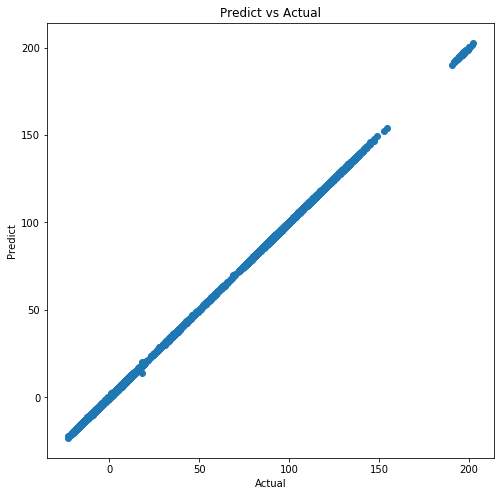

In [31]:
plt.rcParams["figure.figsize"] = (8, 8)
fig, ax = plt.subplots()
ax.scatter(predict, tt_np)
ax.set(title="Predict vs Actual")
ax.set(xlabel="Actual", ylabel="Predict");

Implementing Random Forest Regression

In [32]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [48]:
basicgrid= GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid={'max_depth':range(1,5), 'n_estimators': (10, 100)},
                        cv=3, n_jobs=-1)

In [49]:
basicgridresult= basicgrid.fit(feature_train, target_train)

/Users/Iffy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [52]:
basicbest_params = basicgridresult.best_params_

In [53]:
basicrfr = RandomForestRegressor(max_depth=basicbest_params["max_depth"], n_estimators=basicbest_params["n_estimators"],
                            random_state=False, verbose=False)

In [54]:
basicrfr

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=False,
                      verbose=False, warm_start=False)

In [55]:
# Perform K-Fold CV
basicscores = cross_val_score(basicrfr, feature_train, target_train, cv=5, scoring='neg_mean_absolute_error')

/Users/Iffy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Iffy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Iffy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Iffy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionW

In [56]:
basicscores

array([-1.38064606, -1.38732274, -1.39464166, -1.39300207, -1.40126679])

this shows a rather high mean absolute error. so the ensemble method needs more hyperparameter tuning